# Starter Notebook on Feature Engineering

Add to this notebook with more projects for starter code on feature engineering and information about best practices. 

Data science models are created using different assumptions about the underlying distribution about the data. So, sometimes we have to transform our datasets to match these assumptions in order to get the best results 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Transform to Normal Distribution

One of the most common assumptions for ML models is normal distribution. Linear Regression models for example only work on normally distributed datasets. Here are some examples on These are the examples for how to transform skewed datasets to normal distribution. 

In [3]:
# literal adaption from:
# http://stackoverflow.com/questions/4643285/how-to-generate-random-numbers-that-follow-skew-normal-distribution-in-matlab
# original at:
# http://www.ozgrid.com/forum/showthread.php?t=108175
def rand_skew_norm(fAlpha, fLocation, fScale):
    sigma = fAlpha / np.sqrt(1.0 + fAlpha**2) 

    afRN = np.random.randn(2)
    u0 = afRN[0]
    v = afRN[1]
    u1 = sigma*u0 + np.sqrt(1.0 -sigma**2) * v 

    if u0 >= 0:
        return u1*fScale + fLocation 
    return (-u1)*fScale + fLocation 

def randn_skew(N, skew=0.0):
    return [rand_skew_norm(skew, 0, 1) for x in range(N)]

## Log Transform for Right Skewed Data

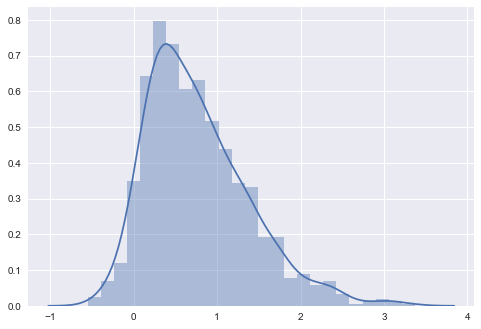

In [14]:
#
import numpy as np
from numpy import log, log1p
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#right skewed data
p = randn_skew(1000, 5)
sns.distplot(p)

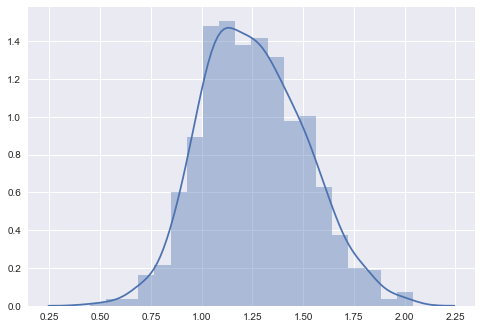

In [33]:
# Log Transform For Right Skewed data

# Use min value transform if there is a value that is less and zero in histogram for log transformation
min_value = min(p)
adjusted_p = p - (min_value -1)

log_data = [math.log(d) for d in adjusted_p]
log_data = log_data + min_value + 1

#plot the transformation
sns.distplot(log_data,bins = 20)

Some statisticians don't like using a translation of the logarithm and instead use missing values 

0.0

# Polynomial Features 

We can estimate higher order relationships by adding polynomial features. This adds more features but maintains a linear model required for a lot of assumptions. 

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# Create instance of class and decide number of features 
polyFeat = PolynomialFeatures(degree=2)

# Create the polynomial features and then transform the data
polyFeat = polyFeat.fit(x_data)
x_poly = polyFeat.transform(x_data)

NameError: name 'x_data' is not defined

# Variable Selection

This entails selecting the features that we want to include in our model. Variables often have to be transformed before they can be used in the model through either encoding or scaling. 

This usually happens when working with categorical features. 

Nominal: Categorical values with no order built in 

Ordinal: Categorical values with ordering component (small, medium, large)

## Binary Encoding or Specified Ordinal Encoding

In [ ]:
# Based on dataset create your own custom encoding values. Binary True False, num cylinders ordinal
cleanup_nums = {"num_doors":     {"True": 1, "False": 0},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

df.replace(cleanup_nums, inplace=True)

## Label Encoding

Label encoding is basically giving every categorical value in a column a number. 



In [ ]:
# Make the column into a category object
df["labeled_column"] = obj_df["labeled_column"].astype('category')
# Create a Category codes column to categorize it
# This example keeps the regular column in the dataframe for future reference 
obj_df["label encoded column"] = obj_df["labeled column"].cat.codes

## One Hot Encoding

Label encoding has the advantage of being straightforward and space saving. However, sometimes it can be misconstrued by the model. The values are not ordinal by nature, but have numerical values 1-6 makes it seem as if the first values is less than the sixth. This is not the case. Despite the different names, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [ ]:
pd.get_dummies(f, columns=["column to encode"]).head()

In [ ]:
# More advanced One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Select Categorical data from dataframe
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
               .apply(lambda x: x.nunique())
               .sort_values(ascending = False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.iloc[num_ohc_cols > 1]

# Number of one hot columns is one less thatn the number of categories
small_num_ohs_cols -= 1

# Get number of rows we would need
small_num_ohs_cols.sum()


#Copy the Data
data_ohc = data.copy()

#Create One Hot Encoder Object
ohc = OneHotEncoder()
#ohc = OneHotEncoder(drop = 'first') to deal with colinearity

for col in num_ohc_cols.index:
    
    #One hot encode the data this returns a sparse array
    new_dat = ohc.fit_transform(data_ohc[[col]])
    
    # Drop original column from dataframe
    data_ohc = data_ohc.drop(col, axis=1)
    
    # Get names of all unique values
    cats = ohc.categories_
    
    # Create column names for each OHE column by value
    new_cols = ['_'.join([col,cat]) for cat. in cats[0]]
    
    # Create new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
    
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc,new_df], axis =1 )

In [ ]:
# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis = 1)

## More Advanced Encodings

# Feature Scaling

It is quite rare that you will have a dataset that consists of all of the same units. If there is one feature in your dataset that has larger units, it can eclipse the other values in the dataset or bias your model. For example, if you have something calculated in feet and another in miles. 

## Standardized Scaling = Standardization

In [42]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


## Min Max Scaling = Normalization

In [41]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Should I standardize or normalize the data? 

If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps you can get away with no scaling of the data.

If in doubt, normalize the input sequence. If you have the resources, explore modeling with the raw data, standardized data, and normalized data and see if there is a beneficial difference in the performance of the resulting model.